In [42]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sb

In [7]:
import os

In [17]:
def model_index(file_name):
    return int(file_name.split('_')[1])

In [53]:
def read_leaderboard(file_name, scale=False):
    result = []
    with open(file_name, "rt", encoding='utf-8') as fd:
        started = False
        for l in fd:
            l = l.strip()
            if not started:
                if l.startswith("Leaderboard"):
                    started = True
                continue
            name, rest = l.split(':')
            wld = map(str.strip, rest.split(','))
            win, lose, draw = map(lambda s: int(s.split('=')[1]), wld)
            # models from the last round played 40% more games, so score need to be compensated
            if scale:
                win = int(win / 1.4)
                lose = int(lose / 1.4)
                draw = int(draw / 1.4)
            result.append((os.path.basename(name), win, lose, draw))
    return result       

# Semi-final analisys

In [55]:
full_data = []
for round in range(10):
    full_data.extend(read_leaderboard("semi-%d.txt" % round, scale=round==9))

In [56]:
full_data.sort(key=lambda p: p[1], reverse=True)
full_data[:10]

[('best_008_02500.dat', 1079, 521, 0),
 ('best_085_46100.dat', 1079, 721, 0),
 ('best_017_09800.dat', 1042, 757, 1),
 ('best_045_25500.dat', 1017, 783, 0),
 ('best_051_29900.dat', 1008, 791, 1),
 ('best_047_28000.dat', 1002, 797, 1),
 ('best_005_01900.dat', 1001, 599, 0),
 ('best_061_34100.dat', 1001, 798, 1),
 ('best_103_55700.dat', 997, 859, 0),
 ('best_097_52100.dat', 994, 862, 0)]

In [57]:
full_pairs = list(map(lambda p: (model_index(p[0]), p[1]), full_data))
full_pairs.sort(key=lambda p: p[0])
indices, wins = zip(*full_pairs)

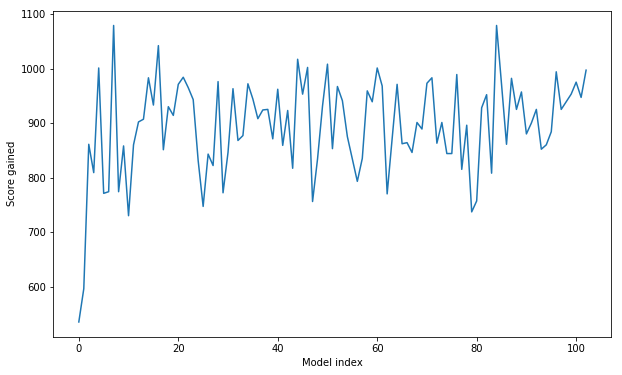

In [65]:
plt.plot(wins)
plt.xlabel("Model index")
plt.ylabel("Score gained")
plt.savefig("semi-common.png")

In [59]:
def group_index(idx):
    if idx >= 100:
        return 9, idx - 90
    return idx // 10, idx % 10

In [60]:
groups = list(map(group_index, indices))

In [61]:
data = [[] for _ in range(10)]
for g, w in zip(groups, wins):
    data[g[0]].append(w)

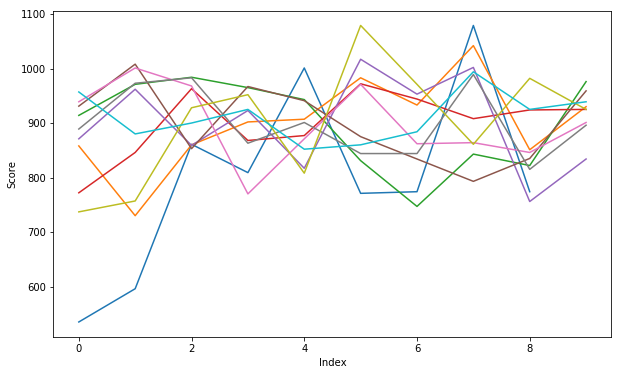

In [67]:
for d in data:
    plt.plot(d[:10])
plt.xlabel("Index")
plt.ylabel("Score")
plt.savefig("semi-scores.png")

# Final scores

In [68]:
final_short = read_leaderboard("final-short.txt")
full_pairs = list(map(lambda p: (model_index(p[0]), p[1]), final_short))
full_pairs.sort(key=lambda p: p[0])
indices, wins = zip(*full_pairs)

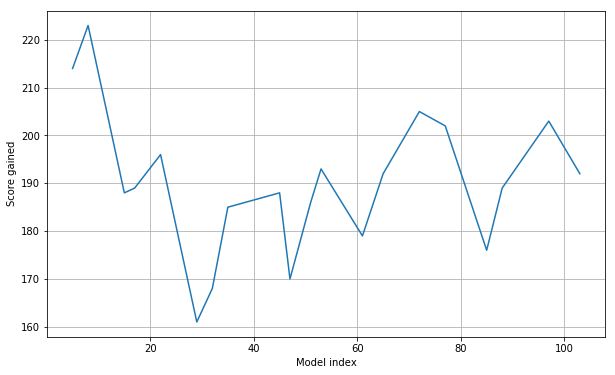

In [72]:
plt.plot(indices, wins)
plt.xlabel("Model index")
plt.ylabel("Score gained")
plt.grid(True)
plt.savefig("final-short.png")